In [99]:
import ipywidgets

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

/home/aman/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [70]:
import os
import sys
import pandas as pd
import numpy as np

data_dir = 'Data/findex_csv/'

In [2]:
os.listdir(data_dir)

['UGA_2014_FINDEX_v01_M_EXCEL_micro_uga_varlabel.csv',
 'KEN_2014_FINDEX_v01_M_EXCEL_micro_ken_varname.csv',
 'TZA_2014_FINDEX_v01_M_EXCEL_micro_tza_varname.csv',
 'KEN_2014_FINDEX_v01_M_EXCEL_micro_ken_varlabel.csv',
 'UGA_2014_FINDEX_v01_M_EXCEL_micro_uga_varname.csv',
 'TZA_2014_FINDEX_v01_M_EXCEL_micro_tza_varlabel.csv']

In [3]:
findex_uga_files = [f for f in os.listdir(data_dir) if 'UGA' in f]

In [8]:
len(pd.read_csv(os.path.join(data_dir, findex_uga_files[0])))

1000

In [30]:
keep_files = [f for f in os.listdir(data_dir) if 'varlabel' in f]
df = pd.concat([pd.read_csv(os.path.join(data_dir, f))for f in keep_files])

In [31]:
len(df)

3008

In [32]:
df.Economy.unique()

array(['Uganda', 'Kenya', 'Tanzania'], dtype=object)

In [33]:
df.Economy.dropna().count()

3008

In [98]:
# all columns

yesnocols = []
for c in df.columns.tolist():
    uniques = df[c].unique()
    if 'yes' in uniques: 
        yesnocols.append(c)
    print "{} : {}".format(c, uniques[:3])

Economy : ['Uganda' 'Kenya' 'Tanzania']
Economy Code : ['UGA' 'KEN' 'TZA']
Gallup World Poll identifier : [113512727 163459263 177743154]
Weight : [ 0.40267837  0.28248153  0.4237223 ]
Respondent is female : ['2 female' '1 male']
Respondent age : ['24' '48' '34']
Respondent education level : ['secondary' 'completed tertiary or more' 'completed primary or less']
Within-economy household income quintile : ['5 richest 20%' '1 poorest 20%' '4 fourth 20%']
Has an account : ['yes' 'no']
Has an account at a financial institution : ['yes' 'no']
Has a mobile money account : ['yes' 'no']
Has a debit card : ['yes' 'no' '(dk)']
If has debit card: card in own name : ['yes' nan 'no']
If has debit card: used card in past 12 months : ['no' nan 'yes']
Has a credit card : ['no' 'yes' '(dk)']
If has credit card: used card in past 12 months : [nan 'yes' 'no']
If does not have account: b/c too far away : [nan 'no' 'yes']
If does not have account: b/c too expensive : [nan 'no' 'yes']
If does not have accoun

/home/aman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [109]:
# all columns excluding contingency columns
# (of the type "if X: Y")
notcontingentcols = [c for c in df.columns.tolist() if not ": " in c]
print notcontingentcols

['Economy', 'Economy Code', 'Gallup World Poll identifier', 'Weight', 'Respondent is female', 'Respondent age', 'Respondent education level', 'Within-economy household income quintile', 'Has an account', 'Has an account at a financial institution', 'Has a mobile money account', 'Has a debit card', 'Has a credit card', 'Made payments online using the Internet', 'Has loan from a financial institution for house, apartment, or land', 'Possibility of coming up with emergency funds', 'Sent domestic remittances in past 12 months', 'Received domestic remittances in past 12 months', 'Paid utility bills in past 12 months', 'Paid school fees in past 12 months', 'Received wage payments in past 12 months', 'Received government transfers in past 12 months', 'Received agricultural payments in past 12 months', 'Saved in the past year', 'Borrowed in the past year']


Saved in the past year
Total number: 2207 (73.37 %)


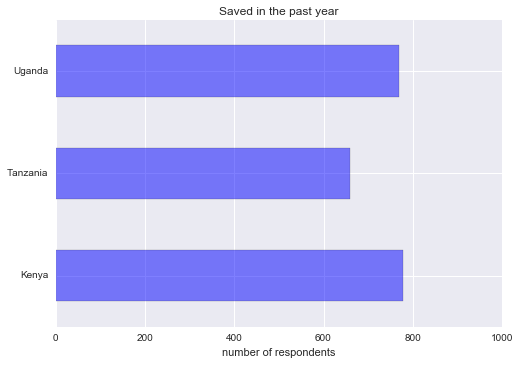

In [199]:
def myaggfunc(vals):
    # vals is np.ndarray-like
    
    # 'yes' / 'no' --> bool
    boolvals = vals == 'yes'
    
    return np.sum(boolvals)
    
#@ipywidgets.interact
def plot_by_country(col):

    mask = df[col] == 'yes'

    print "{}".format(col)
    print "Total number: {} ({:0.02f} %)".format(
        mask.sum(),
        float(mask.sum()) / len(df) * 100,
    )

    # breakdown by country

    ax = df\
        .pivot_table(values=col, columns='Economy', aggfunc=myaggfunc, )\
        .plot(kind='barh', title=col, alpha=0.5)
    ax.set_xlim(0,1000)
    ax.set_ylabel('')
    ax.set_xlabel('number of respondents')
    #return ax

select_cols = set(yesnocols).intersection(notcontingentcols)
s = ipywidgets.Select()
s.options = sorted(list(select_cols))

s.value='Borrowed in the past year'

tt = ipywidgets.interact(plot_by_country, 
                   col=s)
plt.show()

In [196]:
select_cols

{'Borrowed in the past year',
 'Has a credit card',
 'Has a debit card',
 'Has a mobile money account',
 'Has an account',
 'Has an account at a financial institution',
 'Has loan from a financial institution for house, apartment, or land',
 'Made payments online using the Internet',
 'Paid school fees in past 12 months',
 'Paid utility bills in past 12 months',
 'Received agricultural payments in past 12 months',
 'Received domestic remittances in past 12 months',
 'Received government transfers in past 12 months',
 'Received wage payments in past 12 months',
 'Saved in the past year',
 'Sent domestic remittances in past 12 months'}

## Scrapbook

In [59]:
# Respondents that borrowed in the past year
col = s.value
mask = df[col] == 'yes'

print "{}".format(col)
print "Total number: {} ({:0.02f} %)".format(
    mask.sum(),
    float(mask.sum()) / len(df) * 100,
)

#print "

# break down by country

Borrowed in the past year
Total number: 2181 (72.51 %)


In [67]:
df.pivot_table?

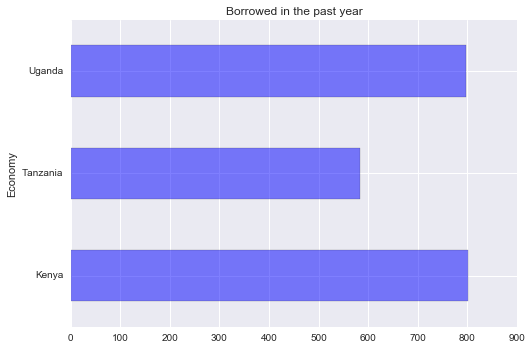

In [93]:
# breakdown by country
def myaggfunc(vals):
    # vals is np.ndarray-like
    
    # 'yes' / 'no' --> bool
    boolvals = vals == 'yes'
    
    return np.sum(boolvals)
    
ax = df\
    .pivot_table(values=col, columns='Economy', aggfunc=myaggfunc, )\
    .plot(kind='barh', title=col, alpha=0.5)
ax.

In [88]:
grp

Economy
Kenya       801
Tanzania    583
Uganda      797
Name: Borrowed in the past year, dtype: int64

In [83]:
tt = grp.values[0]

In [86]:
tt?

In [38]:
print [c for c in df.columns if 'mont' in c.lower()]

['If has debit card: used card in past 12 months', 'If has credit card: used card in past 12 months', 'If has account: any deposit into account in past 12 months', 'If has any deposit into account: number of monthly deposits', 'If has account: any withdrawal from account in past 12 months', 'If has any withdrawal from account: number of monthly withdrawals', 'Saved in past 12 months: for farm/business purposes', 'Saved in past 12 months: for old age', 'Saved in past 12 months: for education or school fees', 'Saved in past 12 months: using an account at a financial institution', 'Saved in past 12 months: using an informal savings club', 'Borrowed in past 12 months: from a financial institution', 'Borrowed in past 12 months: from a store (store credit)', 'Borrowed in past 12 months: from family or friends', 'Borrowed in past 12 months: from another private lender', 'Borrowed in past 12 months: for education or school fees', 'Borrowed in past 12 months: for medical purposes', 'Borrowed in

In [39]:
print [c for c in df.columns if 'past' in c.lower()]

['If has debit card: used card in past 12 months', 'If has credit card: used card in past 12 months', 'If has account: any deposit into account in past 12 months', 'If has account: any withdrawal from account in past 12 months', 'Saved in past 12 months: for farm/business purposes', 'Saved in past 12 months: for old age', 'Saved in past 12 months: for education or school fees', 'Saved in past 12 months: using an account at a financial institution', 'Saved in past 12 months: using an informal savings club', 'Borrowed in past 12 months: from a financial institution', 'Borrowed in past 12 months: from a store (store credit)', 'Borrowed in past 12 months: from family or friends', 'Borrowed in past 12 months: from another private lender', 'Borrowed in past 12 months: for education or school fees', 'Borrowed in past 12 months: for medical purposes', 'Borrowed in past 12 months: for farm/business purposes', 'Sent domestic remittances in past 12 months', 'Received domestic remittances in past 

In [40]:
print [c for c in df.columns if 'borrow' in c.lower()]

['Borrowed in past 12 months: from a financial institution', 'Borrowed in past 12 months: from a store (store credit)', 'Borrowed in past 12 months: from family or friends', 'Borrowed in past 12 months: from another private lender', 'Borrowed in past 12 months: for education or school fees', 'Borrowed in past 12 months: for medical purposes', 'Borrowed in past 12 months: for farm/business purposes', 'Borrowed in the past year']


In [41]:
print [c for c in df.columns if 'deposit' in c.lower()]

['If has account: any deposit into account in past 12 months', 'If has any deposit into account: number of monthly deposits']


In [42]:
print [c for c in df.columns if 'withdr' in c.lower()]

['If has account: any withdrawal from account in past 12 months', 'If has any withdrawal from account: number of monthly withdrawals', 'If has account: most frequent mode of cash withdrawal']
